# Machine Learning Exercise 9

# LeNet - MNIST 



##Import 

Import libraries and print some versions.

To use GPU, set `Edit / Notebook settings / Hardware accelerator` to **GPU**.

In [ ]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import keras

print("Tensorflow version %s" %tf.__version__)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Using TensorFlow backend.


Tensorflow version 1.15.0
Found GPU at: /device:GPU:0


## Load data

Load training data from Keras library




In [ ]:
def load_data():
    # load data
    (Xtrain,Ytrain), (Xtest, Ytest) = keras.datasets.mnist.load_data()
    # get information
    ninput = Xtrain.shape[0]
    imgsize = (Xtrain.shape[1], Xtrain.shape[2])
    input_shape = (Xtrain.shape[1], Xtrain.shape[2], 1)
    ntest = Xtest.shape[0]
    num_classes = max(Ytrain) + 1
    print("Training input %s" %str(Xtrain.shape))
    print("Training output %s" %str(Ytrain.shape))
    print("Test input %s" %str(Xtest.shape))
    print("Test output %s" %str(Ytest.shape))
    print("Input shape: %s" %str(input_shape))
    print("Number of classes: %d" %num_classes)

    # normalize input to [0,1]
    Xtrain = Xtrain / 255.0
    Xtest = Xtest / 255.0
    # reshape input in 4D array
    Xtrain = Xtrain.reshape(ninput,imgsize[0],imgsize[1],1)
    Xtest = Xtest.reshape(ntest,imgsize[0],imgsize[1],1)
    
    # Transform output to one-out-of-n encoding
    Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
    Ytest = keras.utils.to_categorical(Ytest, num_classes)
    
    return [Xtrain,Ytrain,Xtest,Ytest,input_shape,num_classes]
  

[Xtrain,Ytrain,Xtest,Ytest,input_shape,num_classes] = load_data()

11493376/11490434 [==============================] - 2s 0us/step
Training input (60000, 28, 28)
Training output (60000,)
Test input (10000, 28, 28)
Test output (10000,)
Input shape: (28, 28, 1)
Number of classes: 10
10


## Show random image



8


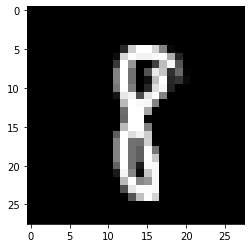

In [ ]:
import matplotlib.pyplot as plt
import random

i = random.randrange(0,Xtrain.shape[0])
image = Xtrain[i]
image = np.array(image, dtype='float')
pixels = image.reshape((28, 28))

label = Ytrain[i].argmax()  # categorical from one-hot-encoding
print(label)

plt.imshow(pixels, cmap='gray')
plt.show()


##LeNet model


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
                         Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras import optimizers

def LeNet(input_shape, num_classes):
    
    print('\nLeNet model')
    model = Sequential()
    
    print('\tC1: Convolutional 6 kernels 5x5')
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
    print('\tS2: Average Pooling 2x2 stride 2x2')
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    print('\tC3: Convolutional 16 kernels 5x5')
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    print('\tS4: Average Pooling 2x2 stride 2x2')
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    print('\tC5: Convolutional 120 kernels 5x5')
    model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    model.add(Flatten())
    print('\tF6: Fully connected, 84 units')
    model.add(Dense(84, activation='tanh'))
    print('\tF7: Fully connected, 10 units')
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = 'adam' #alternative 'SGD'
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
    
    return model
 
# create the model
model = LeNet(input_shape,num_classes)
model.summary()


LeNet model
	C1: Convolutional 6 kernels 5x5
	S2: Average Pooling 2x2 stride 2x2
	C3: Convolutional 16 kernels 5x5
	S4: Average Pooling 2x2 stride 2x2
	C5: Convolutional 120 kernels 5x5
	F6: Fully connected, 84 units
	F7: Fully connected, 10 units
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 120)         48120     
___

## Train

In [ ]:

history = model.fit(Xtrain, Ytrain, batch_size=32, epochs=5, validation_data = (Xtest,Ytest))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 16s 259us/step - loss: 0.2263 - acc: 0.9324 - val_loss: 0.1102 - val_acc: 0.9661
Epoch 2/5
60000/60000 [==============================] - 13s 214us/step - loss: 0.0848 - acc: 0.9745 - val_loss: 0.0845 - val_acc: 0.9754
Epoch 3/5
60000/60000 [==============================] - 13s 210us/step - loss: 0.0564 - acc: 0.9827 - val_loss: 0.0540 - val_acc: 0.9824
Epoch 4/5
60000/60000 [==============================] - 13s 211us/step - loss: 0.0460 - acc: 0.9857 - val_loss: 0.0491 - val_acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 13s 209us/step - loss: 0.0357 - acc: 0.9886 - val_loss: 0.0486 - val_acc: 0.9837


##Evaluate the model

## Print scores

Overall accuracy, precision, recall and F-score 

In [ ]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

# accuracy
score = model.evaluate(Xtest, Ytest)
print("Test loss: %f" %score[0])
print("Test accuracy: %f" %score[1])

preds = model.predict(Xtest,verbose=1)
Ypred = np.argmax(preds, axis=1)

Ypred = keras.utils.to_categorical(Ypred, num_classes)

print('%s' %str(Ypred.shape))
print('%s' %str(Ytest.shape))

print(classification_report(Ytest, Ypred, digits=3))


  

10000/10000 [==============================] - 1s 68us/step
Test loss: 0.048557
Test accuracy: 0.983700
10000/10000 [==============================] - 0s 50us/step
(10000, 10)
(10000, 10)
              precision    recall  f1-score   support

           0      0.981     0.994     0.987       980
           1      0.990     0.996     0.993      1135
           2      0.986     0.987     0.987      1032
           3      0.982     0.979     0.981      1010
           4      0.988     0.971     0.979       982
           5      0.988     0.984     0.986       892
           6      0.991     0.984     0.987       958
           7      0.977     0.982     0.979      1028
           8      0.988     0.978     0.983       974
           9      0.968     0.978     0.973      1009

   micro avg      0.984     0.984     0.984     10000
   macro avg      0.984     0.984     0.984     10000
weighted avg      0.984     0.984     0.984     10000
 samples avg      0.984     0.984     0.984     10000


##Plot results

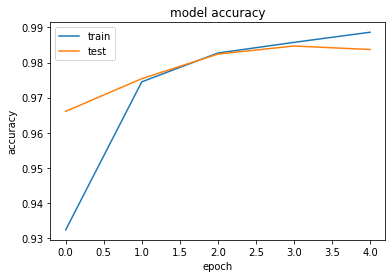

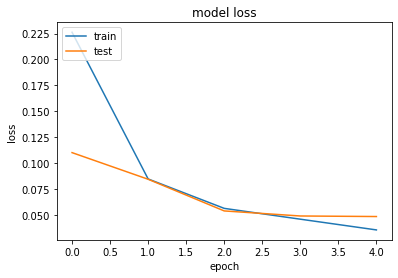

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()